# K Means Clustering

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv *.csv data.csv


Archive:  ./dataset/archive.zip
  inflating: KMeans_student.csv      


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Make Sample to practice on K-Means

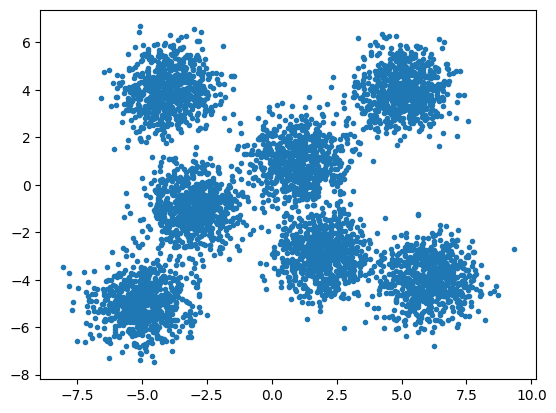

In [3]:
clusters_head = [[-4, 4], [5, 4], [-3, -1], [6, -4], [2, -3], [1, 1], [-5, -5]]
X, y = make_blobs(n_samples=5000, centers=clusters_head, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')


In [4]:
num_cluster_heads = len(clusters_head)
model = KMeans(init = "k-means++", n_clusters = num_cluster_heads, n_init = 20)

In [5]:
model.fit(X)

KMeans(n_clusters=7, n_init=20)

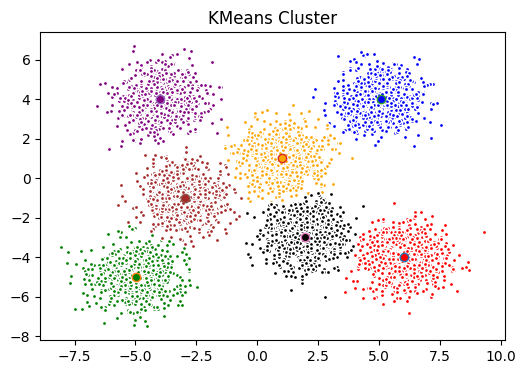

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'brown', 
    'black', 'red', 'green', 'blue', 'yellow', 'pink', 
    'cyan', 'magenta', 'lime', 'indigo', 'violet', 'gold', 
    'silver', 'bronze', 'teal', 'olive', 'maroon', 'navy',
    'peach', 'beige', 'turquoise', 'lavender', 'coral', 'salmon'
]
colors = colors[:num_cluster_heads]

for idx, col in enumerate(colors):
    cluster_members = (model.labels_ == idx)
    cluster_center = model.cluster_centers_[idx]
    
    ax.plot(X[cluster_members, 0], X[cluster_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col)

ax.set_title('KMeans Cluster')
plt.show()

# Real Data

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [7]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,cgpa,iq
0,8.18,94
1,8.31,95
2,8.86,117
3,6.04,110
4,5.05,87


In [8]:
# summarize data
df.describe() 

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


Print the histogram chart of data

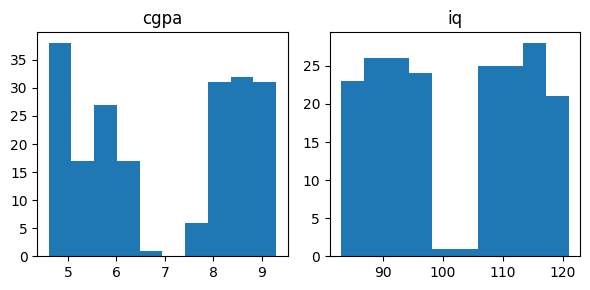

In [9]:
viz = df[['cgpa', 'iq']]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

axes[0].hist(viz['cgpa'])
axes[0].set_title('cgpa')

axes[1].hist(viz['iq'])
axes[1].set_title('iq')

plt.tight_layout()
plt.show()


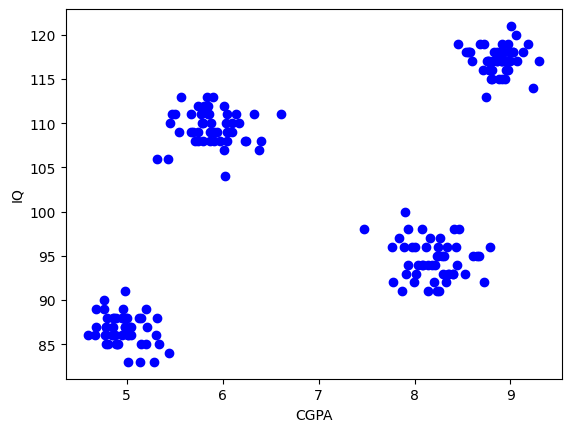

In [10]:
plt.scatter(df.cgpa, df.iq, color="blue")
plt.ylabel("IQ")
plt.xlabel("CGPA")
plt.show()

In [11]:
X = df.values
normal_x = StandardScaler().fit_transform(X)

In [12]:
num_clusters = 4
model = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 20)
model.fit(normal_x)

KMeans(n_clusters=4, n_init=20)

In [13]:
df["cluster"] = model.labels_
df.head()

,cgpa,iq,cluster
0,8.18,94,2
1,8.31,95,2
2,8.86,117,1
3,6.04,110,3
4,5.05,87,0


In [14]:
df.groupby('cluster').mean()


,cgpa,iq
cluster,,
0,4.9676,86.70
1,8.8714,117.16
2,8.1998,94.60
3,5.8948,109.52


In [15]:
normal_x

array([[ 0.73862559, -0.65904677],
       [ 0.81887072, -0.57661441],
       [ 1.15836936,  1.23689766],
       [-0.58233276,  0.6598711 ],
       [-1.19343032, -1.23607334],
       [ 1.17688747,  1.31933003],
       [ 0.80652532, -0.57661441],
       [ 1.28182342,  1.48419476],
       [-1.10083978, -1.07120861],
       [ 1.10898774,  1.1544653 ],
       [ 0.95467018, -0.74147914],
       [-0.50208763,  0.6598711 ],
       [-1.42799301, -1.31850571],
       [-1.13170329, -1.15364097],
       [ 0.57196262, -0.74147914],
       [-0.6872687 ,  0.49500636],
       [-0.69961411,  0.74230346],
       [ 1.10281504,  1.23689766],
       [-0.93417681,  0.74230346],
       [-0.74899573,  0.74230346],
       [ 0.5287537 , -0.41174967],
       [-0.9156587 ,  0.74230346],
       [-0.37246087,  0.412574  ],
       [-1.19343032, -1.31850571],
       [ 1.09046964,  0.9071682 ],
       [-0.59467817,  0.1652769 ],
       [ 1.22626909,  1.1544653 ],
       [-1.27984815, -1.40093807],
       [-1.10083978,

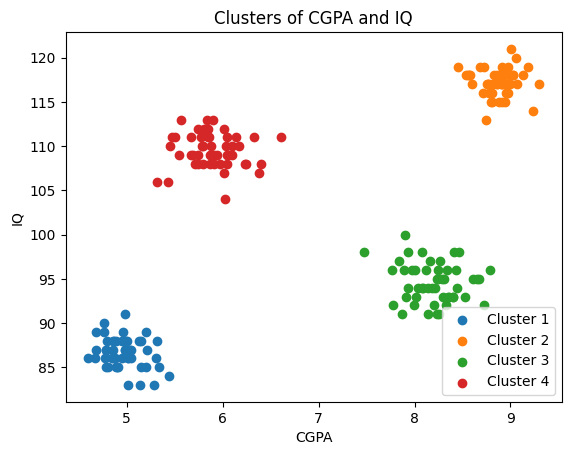

In [16]:
for cluster in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data.cgpa, cluster_data.iq, label=f'Cluster {cluster+1}')

plt.ylabel("IQ")
plt.xlabel("CGPA")
plt.legend()
plt.title("Clusters of CGPA and IQ")
plt.show()

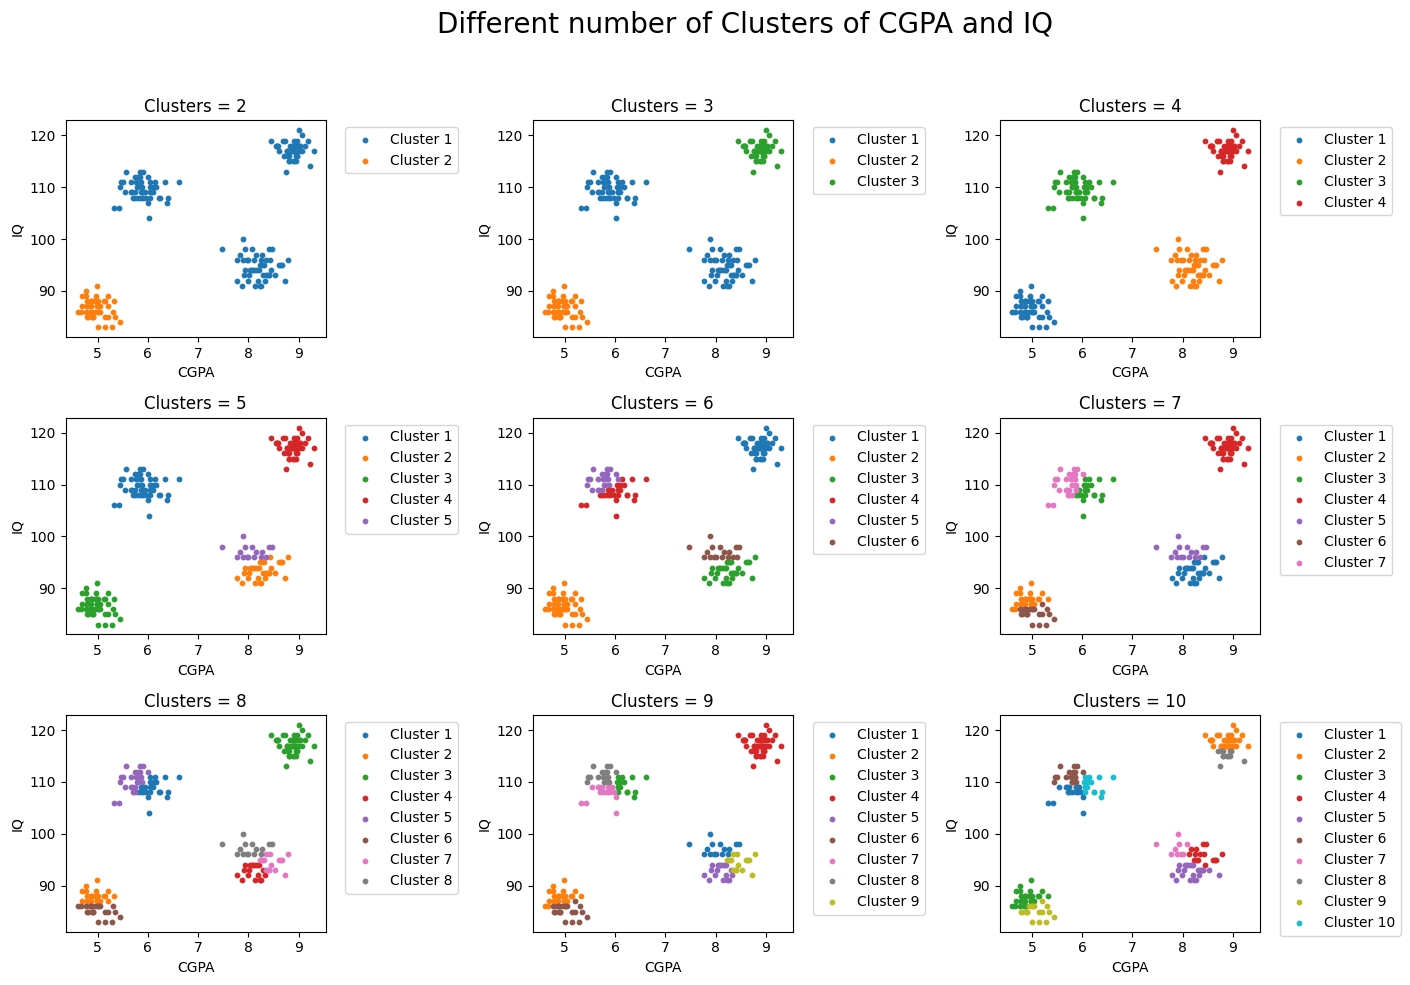

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, num_clusters in enumerate(range(2, 11)):
    ax = axes[i // 3, i % 3]
    model = KMeans(init="k-means++", n_clusters=num_clusters, n_init=20)
    model.fit(normal_x)
    df['cluster'] = model.labels_
    
    for cluster in range(num_clusters):
        cluster_data = df[df['cluster'] == cluster]
        ax.scatter(cluster_data.cgpa, cluster_data.iq, label=f'Cluster {cluster+1}', s=10)
    
    ax.set_ylabel("IQ")
    ax.set_xlabel("CGPA")
    ax.set_title(f"Clusters = {num_clusters}")
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


fig.suptitle("Different number of Clusters of CGPA and IQ", fontsize=20)
fig.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()